In [1]:
import sys
sys.path.append('../..')
import python.mppy as mppy
from python.mluqmppy import *
import python.sgdmppy as sgdplot
from matplotlib import gridspec

mpp = mppy.Mpp(
    project_name='SGD',
    executable='M++',#
    kernels=20,
    mute=False,
    build_dir='mpp/build-sgd',
    cmake_args=['-DMPP_BUILD_TYPE=MppRelease', '-DBUILD_UQ=On']
)

mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/ardar/mpp/build-sgd
-- PROJECT_SOURCE_DIR= /home/ardar/mpp
-- PROJECT_MPP_DIR=    /home/ardar/mpp
-- Option:     BUILD_UQ= On   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     USE_SPLITTED_COMMS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-

0

# Allgemein
Im Folgenden betrachten wir das optimale Kontrollproblem

\begin{alignat}{3}\label{eq:MP1}
	(P)\quad \min_{u\in X_{ad}}             &\quad&  j(u):=\mathbb{E}[J(u, \xi)]:=\mathbb{E}&\left[\frac{1}{2}\left\|y-y^\text{D}\right\|_{\textrm{L}^2(D)}^{2}\right]+&&\frac{\lambda}{2}\|u\|_{\textrm{L}^2(D)}^{2} \\
	\text{unter} &\quad& -\nabla \cdot(a(x, \xi) \nabla y(x, \xi))    & =u(x), && (x, \xi) \in D \times \Xi \label{eq:MP_restr1}\\
	&\quad&   y(x, \xi)                       & =0,   && (x, \xi) \in \partial D \times \Xi \label{eq:MP_restr2},
\end{alignat}
wobei
\begin{equation}
	X_{ad}:=\left\{u \in \textrm{L}^2(D): u_{a}(x) \leq u(x) \leq u_{b}(x) \text{ für fast alle } x \in D\right\}.
\end{equation}

Für den Algorithmus den wir verwenden, betrachten wir genauer die diskretisierte Variante der schwachen Formulierung und lösen diese dann mit dem stochastischen Gradientenverfahren.

### Beispiel 1: Deterministisches Kontrollbeispiel
Hierzu wurde $D=[0,1]^2$, $a(x)=1$, $y^D=sin(2\pi x_1)sin(2\pi x_2)$ und $\lambda=0$ gewählt. Dies führt dazu, dass zur optimalen Steuerung $u$ der zugehörige Zustand $y^D$ ist. Um dies zu demonstrieren, untersuchen wir im Folgenden den Fehler von $y$ also $\left\|y-y^{D}\right\|_{L^2(D)}$.
Es gilt außerdem $u_a=-\infty$ und $u_b=+\infty$, sodass $X_{ad}=L^2(D)$ ist.
\begin{alignat}{3}
	(P)\quad \min_{u\in L^2(D)}             &\quad&  j(u):=&\frac{1}{2}\left\|y-y^{D}\right\|_{L^2(D)}^{2}&& \\
	\text{ unter } &\quad& -\Delta y(x)    & =u(x), && x \in D\\
	&\quad&   y(x)                       & =0,   && x \in \partial D,
\end{alignat}

In einer ersten Rechnung, wird die Auswirkung des Diskretisierungslevels auf die Lösung gezeigt.


================ running  mpp ================

start program on 4 procs at Thu Feb  8 16:50:13 2024
Running on: TOQAJEW
   Config Info:
     alpha: ................................... 1
     AssembleVerbose: ......................... 0
     c: ....................................... 0.25
     ConfigVerbose: ........................... 1
     D_ad: .................................... 1500
     degree: .................................. 1
     descent_type: ............................ SGD
     est_sample_size: ......................... 1
     gamma: ................................... 800
     gamma_adam: .............................. 0.568
     GeneratorVerbose: ........................ 0
     GradEst: ................................. SGD
     lam_reg: ................................. 0.0
     lambda: .................................. [0.15, 0.15, 0.15]
     level: ................................... 2
     LinearVerbose: ........................... 0
     load_test: ...........

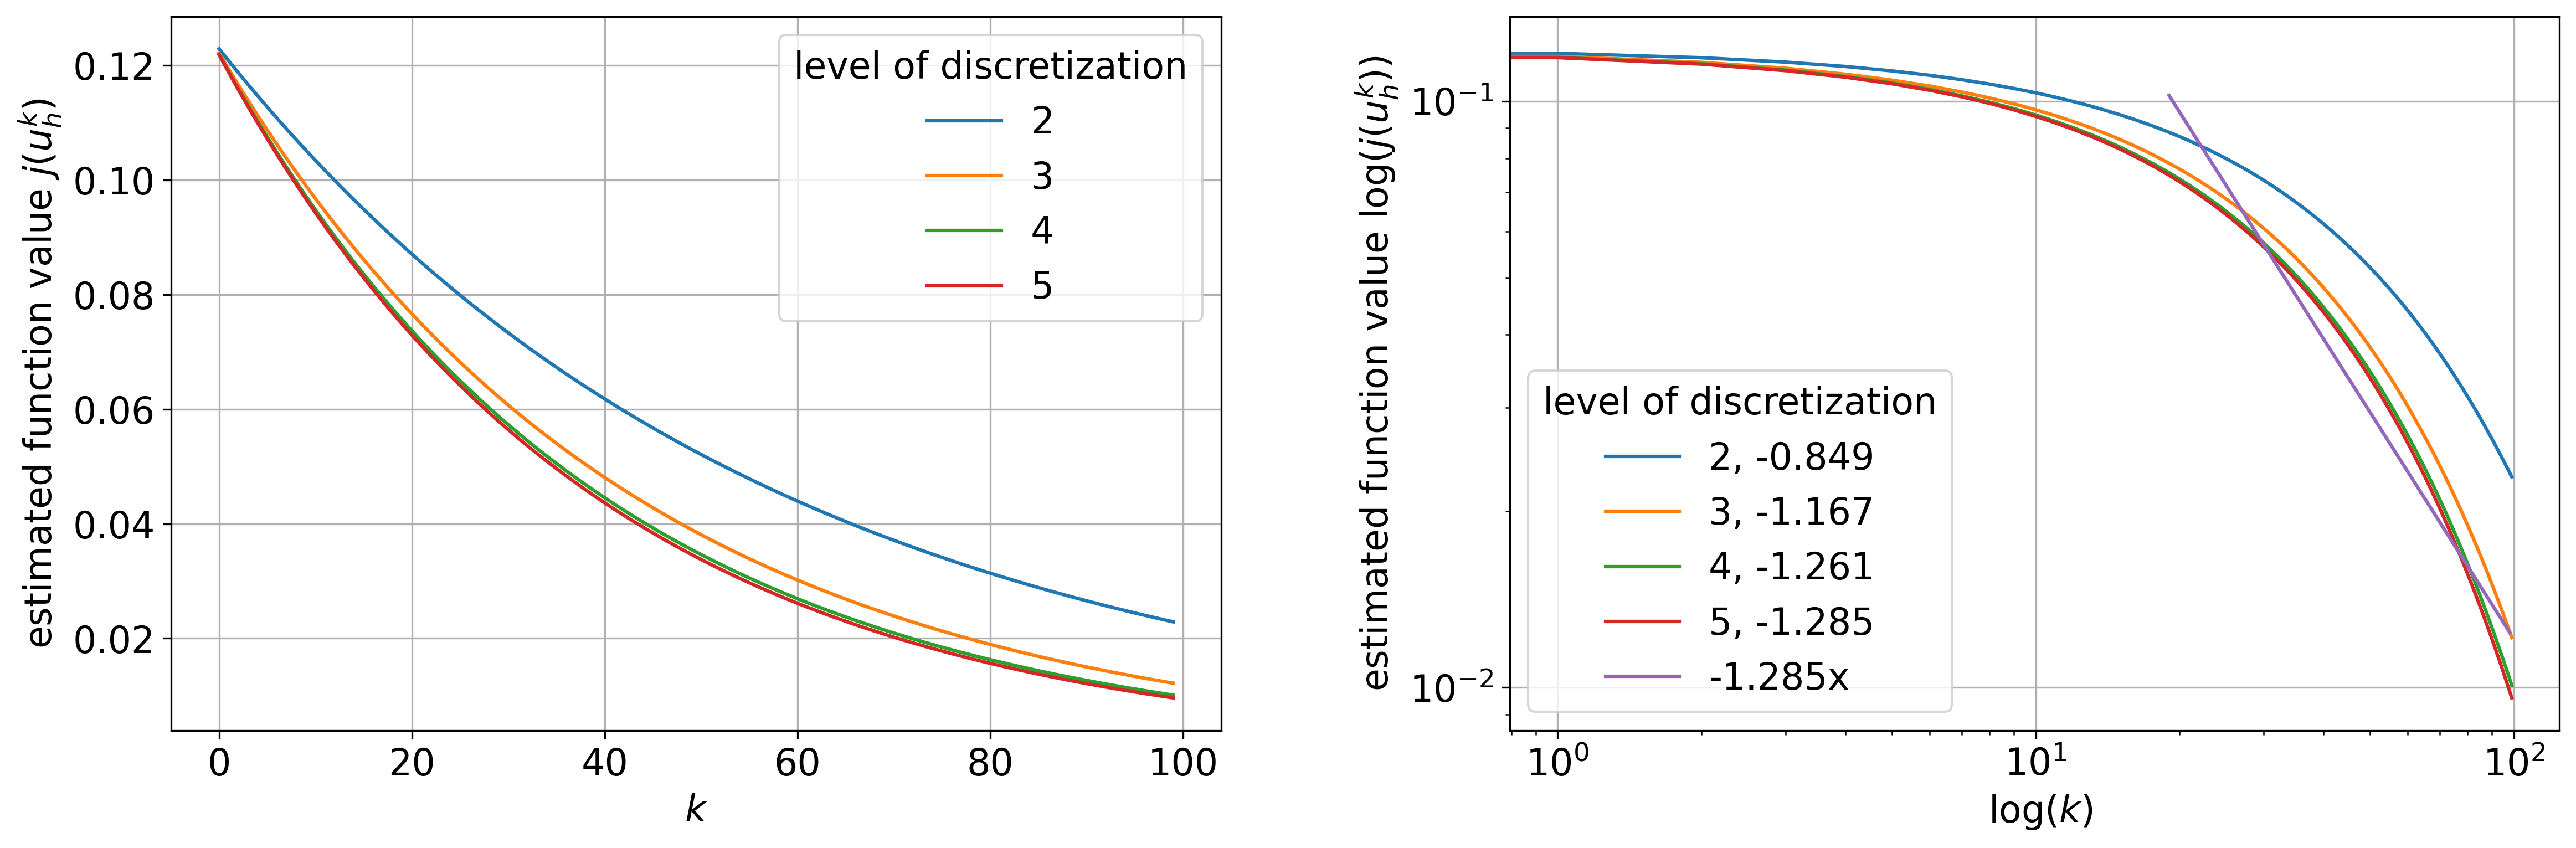

In [2]:
mpp.reset_data()
n=6

###Calculate determenistic oc solution for level 2,3,..,n-1
for i in range(2,n):
    mpp.run(4, config="SGD", kwargs={"Problem": "OptimalLaplace2D", "VtuPlot": 0, "level": i, "max_steps": 100, "alpha": 1, "D_ad": 1500, "c": 0.25, "step_size_rule": "constant", "SGDVerbose": 0, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 1, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": "SGD", "ConfigVerbose": 1})
    mpp.parse_json()

sgdplot.plot_results(mpp, 'test', save_plot = False, show_plot = True)


================ running  mpp ================

start program on 4 procs at Thu Feb  8 16:50:20 2024
Running on: TOQAJEW
   Config Info:
     alpha: ................................... 1
     AssembleVerbose: ......................... 0
     c: ....................................... 1
     ConfigVerbose: ........................... 1
     D_ad: .................................... 100
     degree: .................................. 1
     descent_type: ............................ GD
     est_sample_size: ......................... 1
     gamma: ................................... 800
     gamma_adam: .............................. 0.568
     GeneratorVerbose: ........................ 0
     GradEst: ................................. SGD
     lam_reg: ................................. 0.0
     lambda: .................................. [0.15, 0.15, 0.15]
     level: ................................... 5
     LinearVerbose: ........................... 0
     load_test: ................

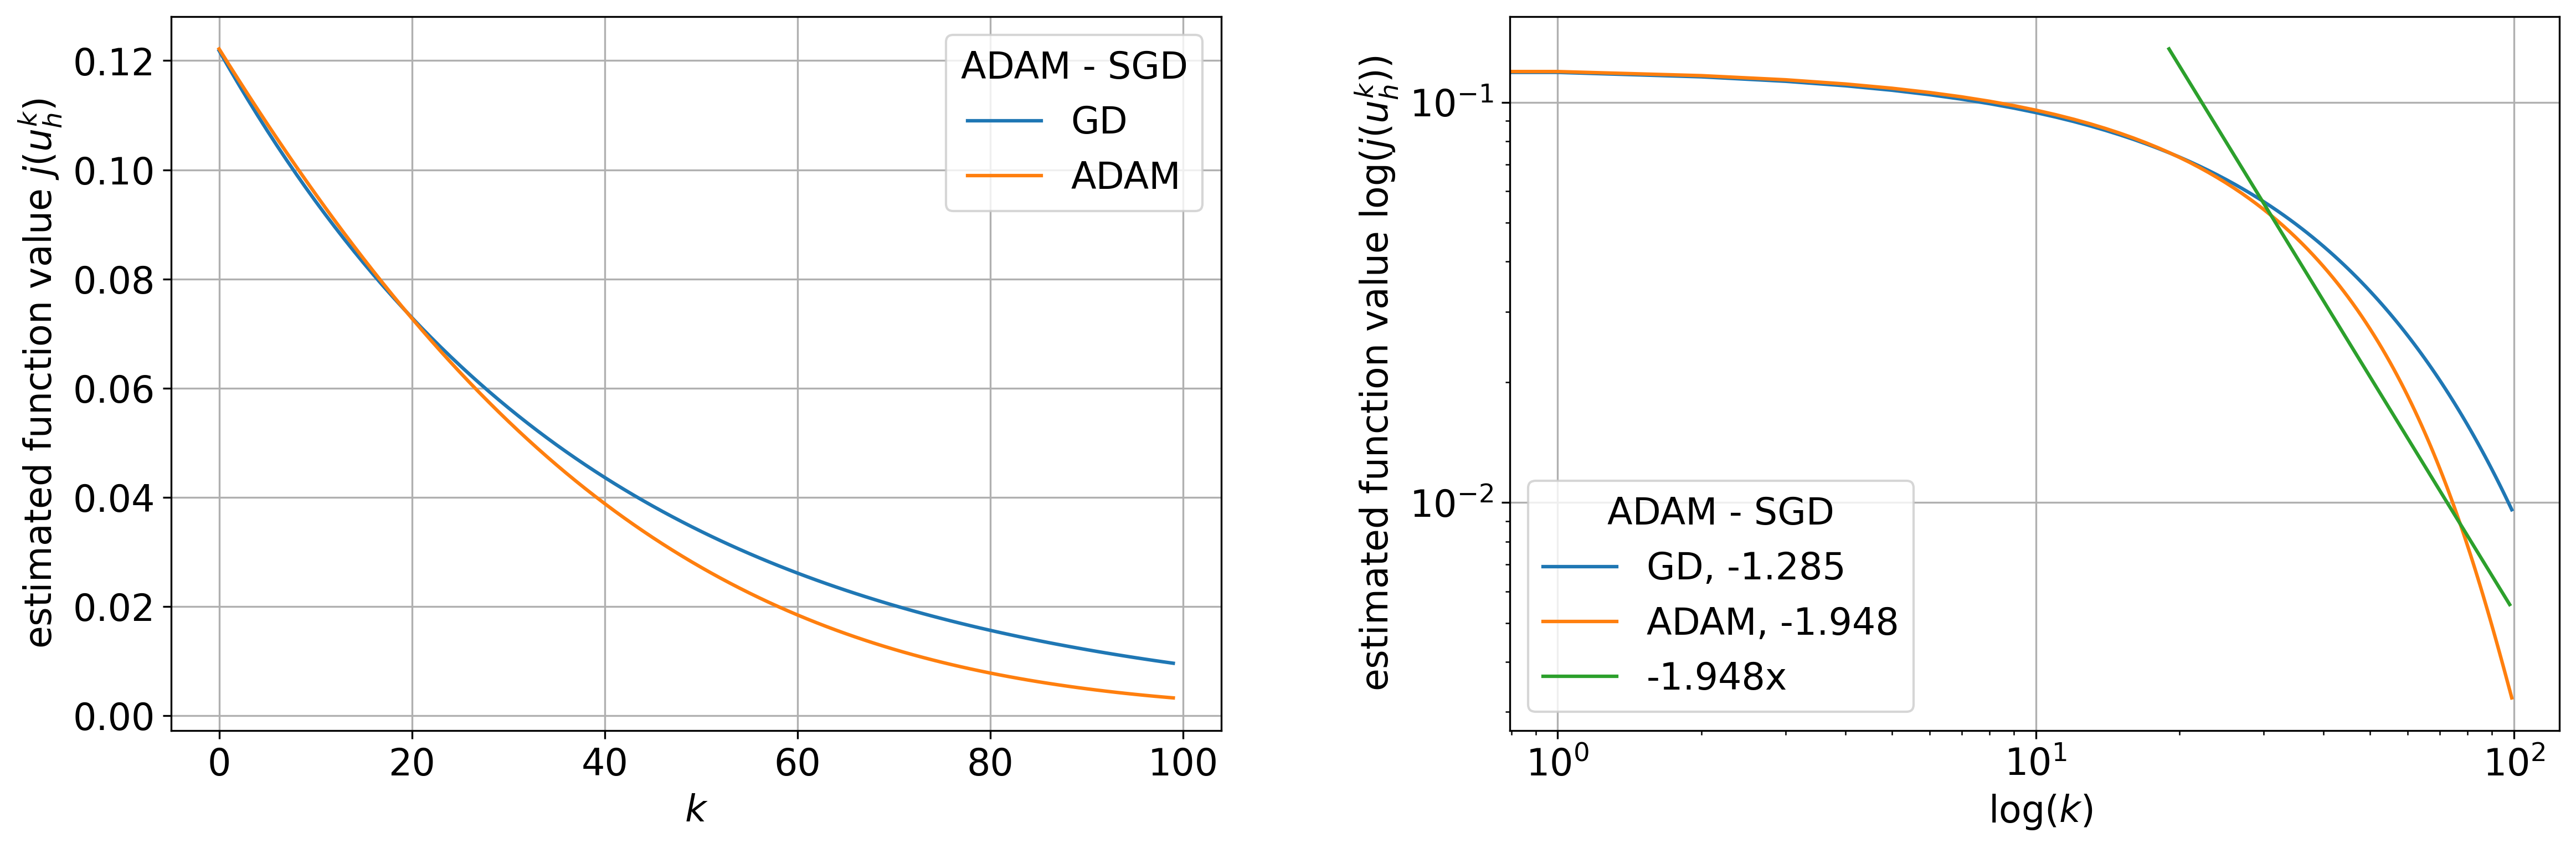

In [3]:
### Test ADAM für deterministisch
mpp.reset_data()

### SW deutlich kleiner als zuvor (ADAM SW * 30 =~ Hier gewählte SW für SGD)
mpp.run(4, config="SGD", kwargs={"Problem": "OptimalLaplace2D", "VtuPlot": 0, "level": 5, "max_steps": 100, "alpha": 1, "D_ad": 100, "c": 1, "step_size_rule": "constant", "SGDVerbose": 0, 'ConfigVerbose': 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 1, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'GD'})
mpp.parse_json()
mpp.run(4, config="SGD", kwargs={"Problem": "OptimalLaplace2D", "VtuPlot": 0, "level": 5, "max_steps": 100, "alpha": 1, "D_ad": 100, "c": 1, "step_size_rule": "ADAM", "SGDVerbose": 0, 'ConfigVerbose': 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 1, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'ADAM'})
mpp.parse_json()

sgdplot.plot_results(mpp, 'test', type = 'adam vs. sgd', plot_config='110')#

Zur Erinnerung: Wir betrachten das optimale Kontrollproblem

\begin{alignat}{3}\label{eq:MP1}
	(P)\quad \min_{u\in X_{ad}}             &\quad&  j(u):=\mathbb{E}[J(u, \xi)]:=\mathbb{E}&\left[\frac{1}{2}\left\|y-y^{D}\right\|_{L^2(D)}^{2}\right]+&&\frac{\lambda}{2}\|u\|_{L^2(D)}^{2} \\
	\text{unter} &\quad& -\nabla \cdot(a(x, \xi) \nabla y(x, \xi))    & =u(x), && (x, \xi) \in D \times \Xi \label{eq:MP_restr1}\\
	&\quad&   y(x, \xi)                       & =0,   && (x, \xi) \in \partial D \times \Xi \label{eq:MP_restr2},
\end{alignat}
wobei
\begin{equation}
	X_{ad}:=\left\{u \in L^2(D): u_{a}(x) \leq u(x) \leq u_{b}(x) \text{ für fast alle } x \in D\right\}.
\end{equation}

Das hier untersuchte Problem sieht nun folgende Parameter vor: $D=[0,1]^2$, $a(x)$ ist ein log-normal-field, $y^D=sin(2\pi x_1)sin(2\pi x_2)$ und $\lambda=0.001$. Weiter gilt wie bisher $u_a=-\infty$ und $u_b=+\infty$, sodass erneut $X_{ad}=L^2(D)$ ist. Da für dieses Problem bisher keine Referenzlösung berechnet werden kann und auch mit dem Wert $\lambda=0$ keine Konvergenz des Zustandes gegen $y^D$ untersucht werden kann, da der Zustand keine deteministische Funktion ist. Um hier dennoch einige vorläufige Resultate zu liefern, soll nun für die unterschiedlichen Parameter Wahlen und die unterschiedlichen Algorithmus Konstellationen wieder $\Vert u_k\Vert_{L^2}$ untersucht werden, da die Steuerung deterministisch ist.

In [4]:
### Vergleich mcsgd mit single sgd
mpp.reset_data()

l = 4 #Höhere Level brauchen viel länger zum rechnen
j = 1000 #Wieviel Samples werden zum Schätzen der Zielfunktion verwendet.
for M in [1,10]:
    mpp.run(4, config="SGD", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 100, "alpha": 1, "theta": 55, "nu":10, "SGDVerbose": 1, 'ConfigVerbose': 1, "lam_reg": 0.001, "M": M, "overkill": 1, "est_sample_size": j, "QOI_type": "value", "u_a": -25, "u_b": 25, "descent_type": 'SGD', 'GradEst': 'MC'})
    mpp.parse_json()


================ running  mpp ================

start program on 4 procs at Thu Feb  8 16:50:30 2024
Running on: TOQAJEW
   Config Info:
     alpha: ................................... 1
     AssembleVerbose: ......................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     descent_type: ............................ SGD
     est_sample_size: ......................... 1000
     gamma: ................................... 800
     gamma_adam: .............................. 0.568
     GeneratorVerbose: ........................ 0
     GradEst: ................................. MC
     lam_reg: ................................. 0.001
     lambda: .................................. [0.15, 0.15, 0.15]
     level: ................................... 4
     LinearVerbose: ........................... 0
     load_test: ............................... false
     M: ....................................... 1
     MainVerbose: .......

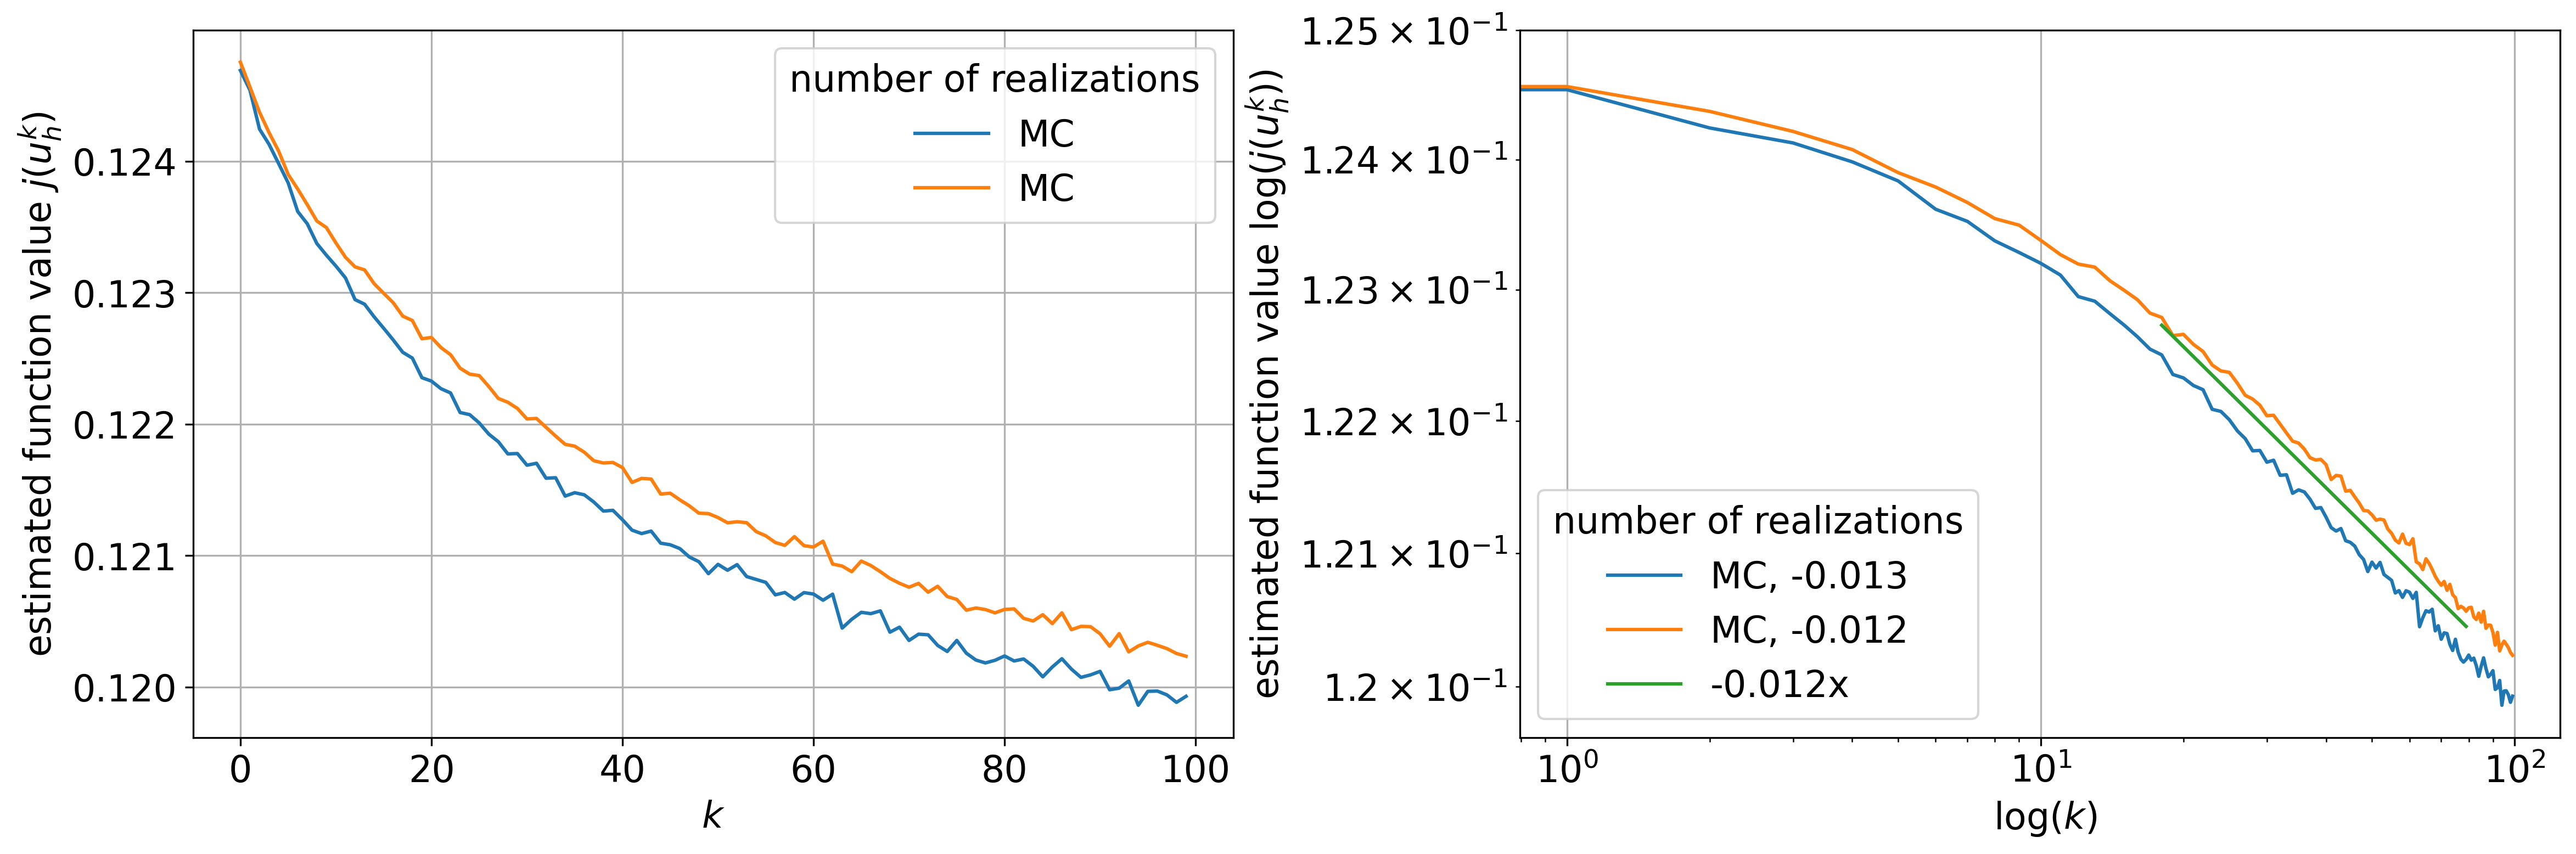

In [5]:
sgdplot.plot_results(mpp, 'test', type = 'mc vs. sgd', plot_config='110')#


================ running  mpp ================

start program on 4 procs at Thu Feb  8 17:08:31 2024
Running on: TOQAJEW
   Config Info:
     alpha: ................................... 1
     AssembleVerbose: ......................... 0
     c: ....................................... 1
     ConfigVerbose: ........................... 1
     D_ad: .................................... 100
     degree: .................................. 1
     descent_type: ............................ GD
     est_sample_size: ......................... 1
     gamma: ................................... 800
     gamma_adam: .............................. 0.568
     GeneratorVerbose: ........................ 0
     GradEst: ................................. SGD
     lam_reg: ................................. 0.0
     lambda: .................................. [0.15, 0.15, 0.15]
     level: ................................... 5
     LinearVerbose: ........................... 0
     load_test: ................

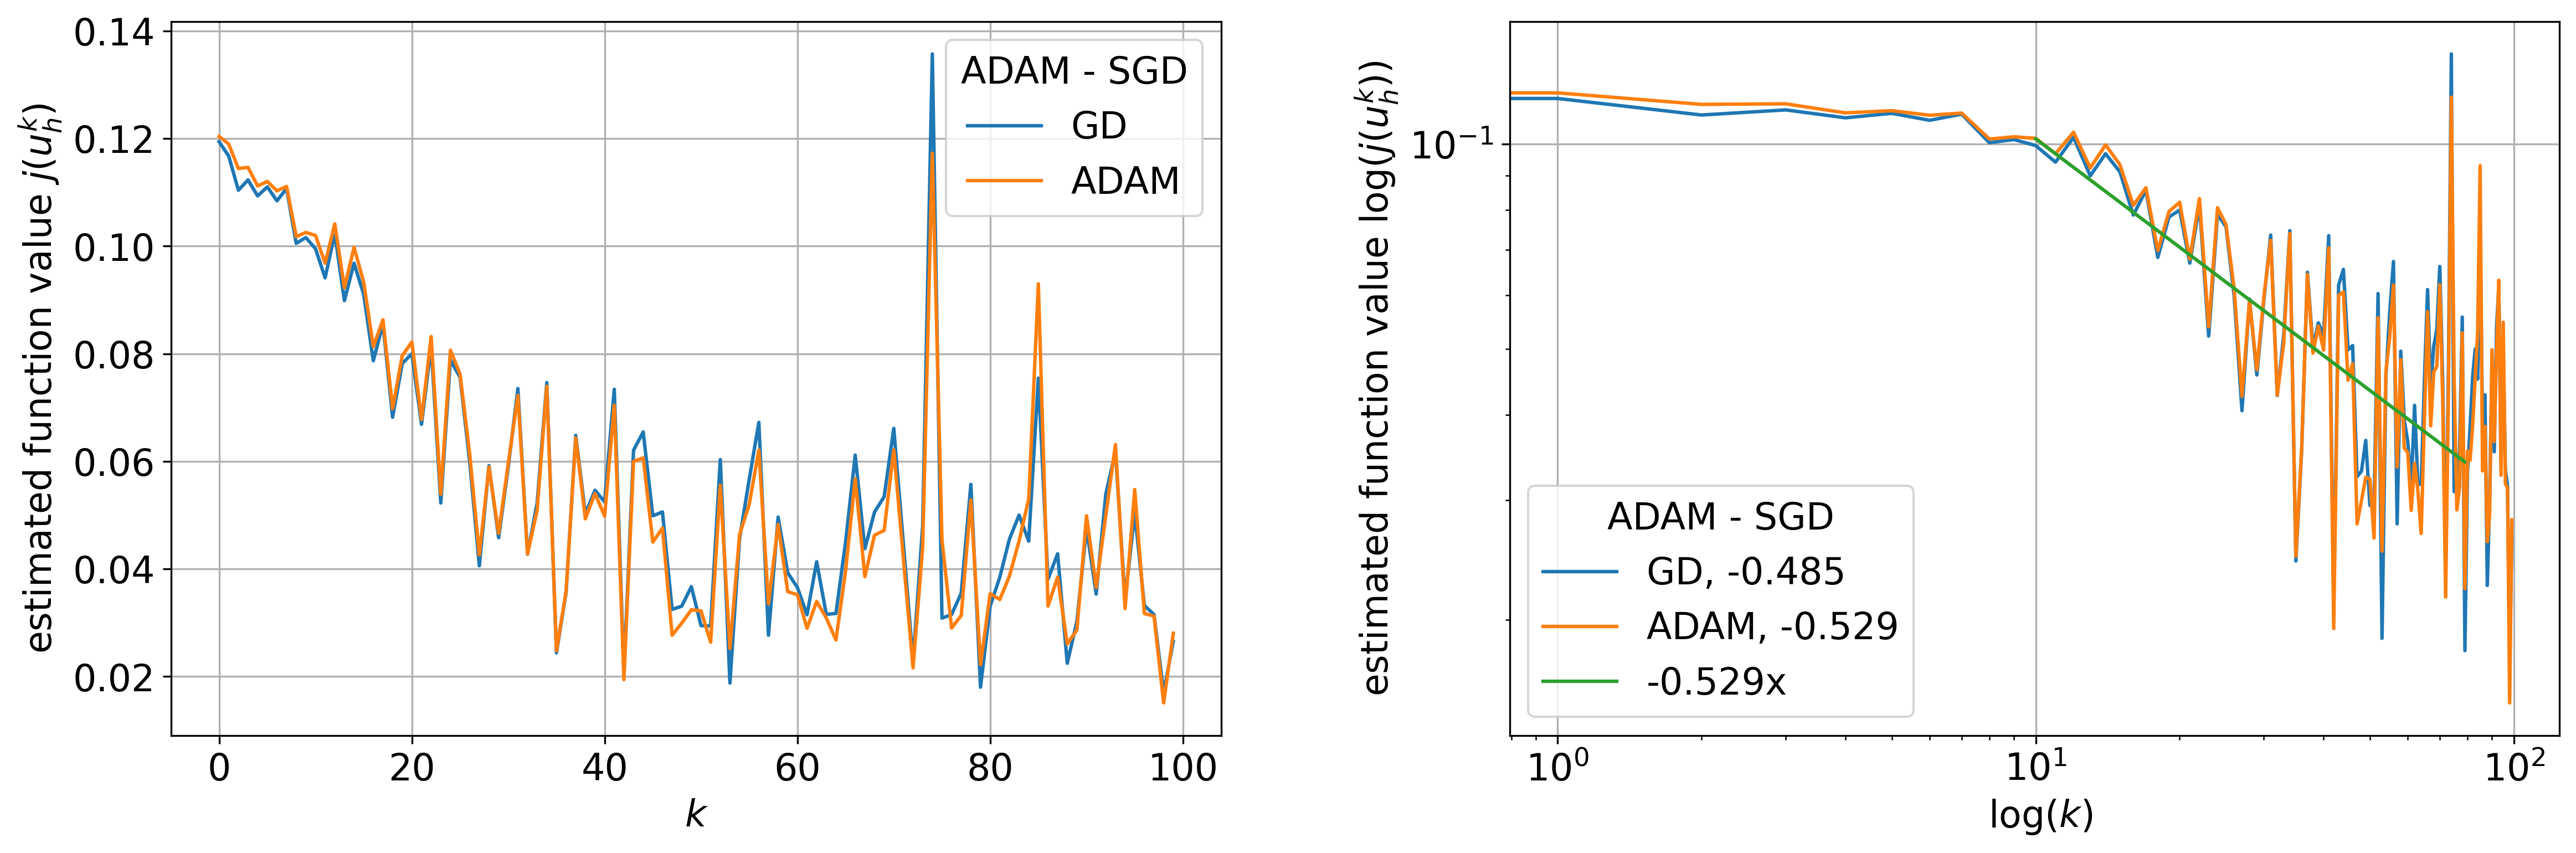

In [6]:
### Vergleich ADAM mit sgd
mpp.reset_data()

l = 4
j = 1000

mpp.run(4, config="SGD", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 5, "max_steps": 100, "alpha": 1, "D_ad": 100, "c": 1, "step_size_rule": "constant", "SGDVerbose": 0, 'ConfigVerbose': 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 1, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'GD'})
mpp.parse_json()
mpp.run(4, config="SGD", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 5, "max_steps": 100, "alpha": 1, "D_ad": 100, "c": 1, "step_size_rule": "ADAM", "SGDVerbose": 0, 'ConfigVerbose': 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 1, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'ADAM'})
mpp.parse_json()

sgdplot.plot_results(mpp, 'test', type = 'adam vs. sgd', plot_config='110')#

mpp.clean_data()